In [1]:
import json
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openweathermapy.core as owm
from citipy import citipy

In [2]:
apikey='dbac7725005cdcf8cd4cdea4088e4822'
url='http://api.openweathermap.org/data/2.5/weather?'
units='Imperial'
settings = {"units": "Imperial", "appid": apikey}

In [3]:
lat_coord = np.random.uniform(-90,90,600)
lng_coord = np.random.uniform(-180,180,600)

In [4]:
city_df=pd.DataFrame()
city_df['City']=''
city_df['Country Code']=''
city_df['Lat']=''
city_df['Lng']=''
city_df['Max Temp(F)']=''
city_df['Humidity(%)']=''
city_df['Cloudiness (%)']=''
city_df['Wind Speed (mph)']=''

In [5]:
for x in range(len(lat_coord)):
    city_df.set_value(x,'City',citipy.nearest_city(lat_coord[x], lng_coord[x]).city_name.upper())
    city_df.set_value(x,'Country Code',citipy.nearest_city(lat_coord[x],lng_coord[x]).country_code.upper())
    city_df.set_value(x,'Lat',round(lat_coord[x],2))
    city_df.set_value(x,'Lng',round(lng_coord[x],2))

C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future relea

In [6]:
city_df.head()

,City,Country Code,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness (%),Wind Speed (mph)
0,TAOLANARO,MG,-51.87,53.12,NaN,NaN,NaN,NaN
1,ARRAIAL DO CABO,BR,-43.19,-23.09,NaN,NaN,NaN,NaN
2,RIKITEA,PF,-53.54,-111.4,NaN,NaN,NaN,NaN
3,BUSSELTON,AU,-51.32,88.76,NaN,NaN,NaN,NaN
4,AVARUA,CK,-73.14,-166.33,NaN,NaN,NaN,NaN


In [7]:
counter=0
for index, row in city_df.iterrows():
    try:
        weather_data = owm.get_current("{},{}".format(row['City'],row['Country Code']),**settings)

        city_df.set_value(index, 'Max Temp(F)', weather_data('main.temp_max'))
        city_df.set_value(index, 'Humidity(%)', weather_data('main.humidity'))
        city_df.set_value(index, 'Cloudiness (%)', weather_data('clouds.all'))
        city_df.set_value(index, 'Wind Speed (mph)', weather_data('wind.speed'))
        counter=counter+1

    except:
        city_df.set_value(index, 'Max Temp(F)', np.nan)
        city_df.set_value(index, 'Humidity(%)', np.nan)
        city_df.set_value(index, 'Cloudiness (%)', np.nan)
        city_df.set_value(index, 'Wind Speed (mph)', np.nan)
        counter=counter+1
        
city_df=city_df.dropna()        
city_df.head()

C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\WAQAS ISHAQ\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.laun

,City,Country Code,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness (%),Wind Speed (mph)
1,ARRAIAL DO CABO,BR,-43.19,-23.09,75.2,73,0,11.41
2,RIKITEA,PF,-53.54,-111.4,72.49,100,92,11.88
3,BUSSELTON,AU,-51.32,88.76,61.51,100,88,8.97
4,AVARUA,CK,-73.14,-166.33,69.8,83,20,5.82
6,NEW NORFOLK,AU,-61.79,132.31,44.6,87,75,6.93


In [8]:
city_df.to_csv("City Weather Data.csv")

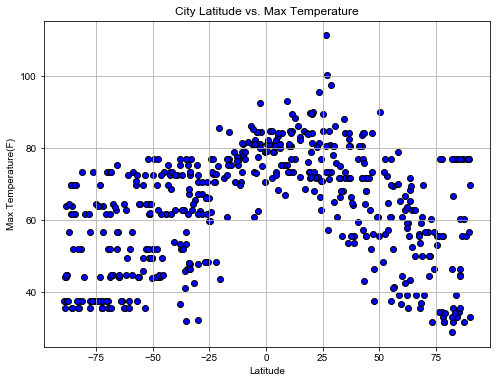

In [9]:
# Temperature (F) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Max Temp(F)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

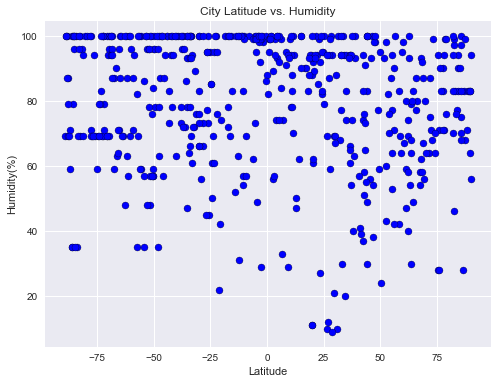

In [10]:
# Humidity (%) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Humidity(%)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Humidity.png')
plt.show()

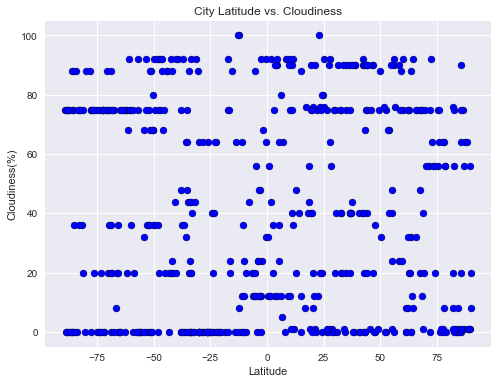

In [11]:
# Cloudiness (%) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Cloudiness (%)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

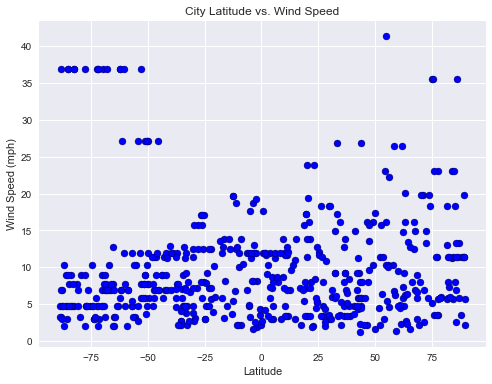

In [12]:
# Wind Speed (mph) vs. Latitude
plt.figure(figsize=(8,6))
plt.scatter(city_df['Lat'], city_df['Wind Speed (mph)'], facecolors='blue', edgecolors='black', marker="o")
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
sns.set()
plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()